In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
df = pd.read_csv("../data/processed/featured.csv")
parse_dates = ['DATE']
df.head()

,CONS_NO,FLAG,DATE,CONSUMPTION,YEAR,MONTH,DAY,DAY_OF_WEEK,ROLL_MEAN_3,ROLL_STD_3,ROLL_MEAN_7,DIFF_1
0,CUST_0001,1,2014-01-01,5.68,2014,1,1,2,5.680000,NaN,5.680000,NaN
1,CUST_0001,1,2014-01-02,9.22,2014,1,2,3,7.450000,2.503158,7.450000,3.54
2,CUST_0001,1,2014-01-03,1.92,2014,1,3,4,5.606667,3.650552,5.606667,-7.30
3,CUST_0001,1,2014-01-04,5.89,2014,1,4,5,5.676667,3.654673,5.677500,3.97
4,CUST_0001,1,2014-01-05,12.96,2014,1,5,6,6.923333,5.592069,7.134000,7.07


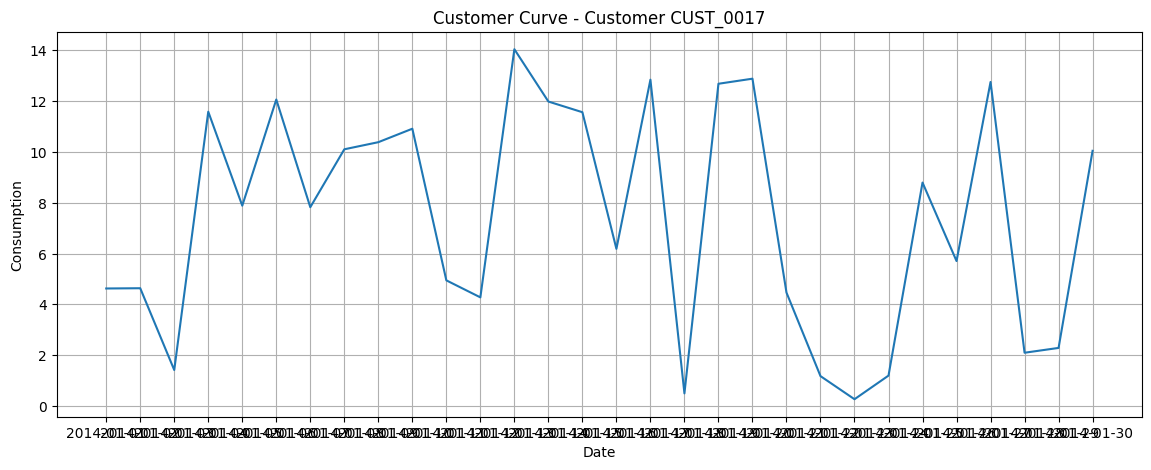

In [10]:
def plot_random_customer(df):
    cust = random.choice(df["CONS_NO"])
    temp = df[df["CONS_NO"] ==cust]
    plt.figure(figsize=(14,5))
    plt.plot(temp["DATE"], temp["CONSUMPTION"])
    plt.title(f"Customer Curve - Customer {cust}")
    plt.xlabel("Date")
    plt.ylabel("Consumption")
    plt.grid()
    plt.show()

plot_random_customer(df)

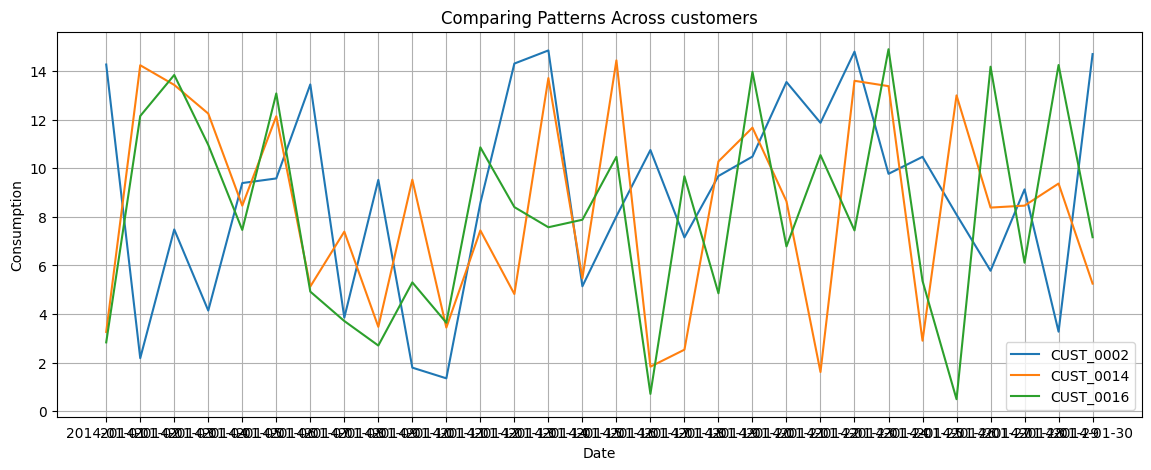

In [12]:
def plot_patterns(df, cust_list):
    plt.figure(figsize=(14,5))
    for cust in cust_list:
        temp = df[df["CONS_NO"] ==cust]
        plt.plot(temp["DATE"], temp["CONSUMPTION"], label=str(cust))
    plt.title("Comparing Patterns Across customers")
    plt.xlabel("Date")
    plt.ylabel("Consumption")
    plt.legend()
    plt.grid(True)
    plt.show()

random_cust = random.sample(list(df["CONS_NO"].unique()), 3)
plot_patterns(df, random_cust)

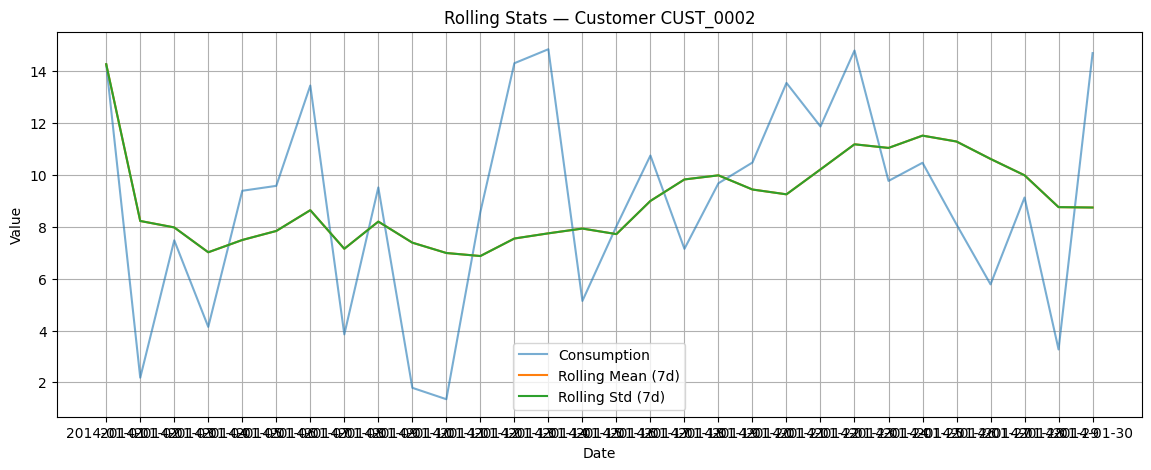

In [14]:
def plot_rolling_stats(df):
    cust = random.choice(df["CONS_NO"].unique())
    temp = df[df["CONS_NO"] == cust]

    plt.figure(figsize=(14,5))
    plt.plot(temp["DATE"], temp["CONSUMPTION"], label="Consumption", alpha=0.6)
    plt.plot(temp["DATE"], temp["ROLL_MEAN_7"], label="Rolling Mean (7d)")
    plt.plot(temp["DATE"], temp["ROLL_MEAN_7"], label="Rolling Std (7d)")
    plt.title(f"Rolling Stats — Customer {cust}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_rolling_stats(df)

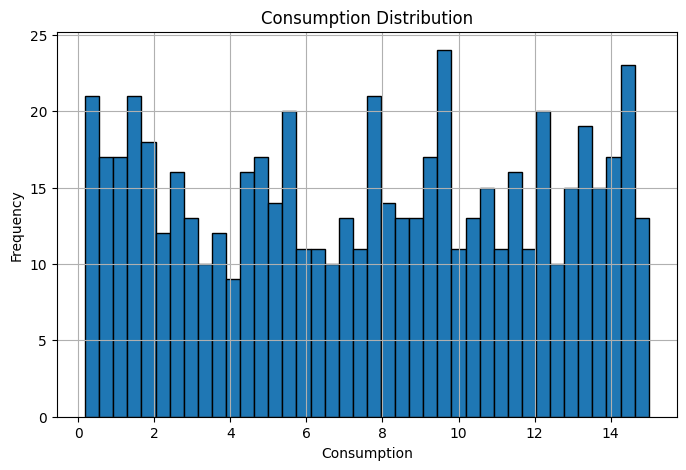

In [15]:
plt.figure(figsize=(8,5))
plt.hist(df["CONSUMPTION"], bins=40, edgecolor="black")
plt.title("Consumption Distribution")
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()